# Description for Modules
pandas-> read our csv files

numpy-> convert the data to suitable form to feed into the classification data

seaborn and matplotlib-> For visualizations

sklearn-> To use logistic regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


# Reading the "diabetes_data.csv" file

# The given dataset has the information about the symptoms developed by the patients

In [ ]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/DIabetes/diabetes_data.csv")
diabetes_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Finding Irregularities in the dataset like NaN values, null values and empty, values

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# 

In [ ]:
diabetes_df.describe(include = "all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Checking the availability of NaN/Null values in the data and showing it with a seaborn heatmap

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


<function matplotlib.pyplot.show>

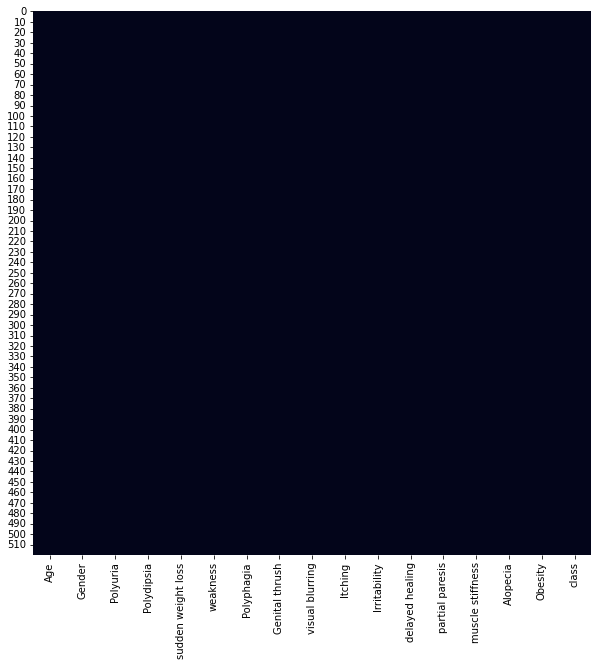

In [ ]:
print(diabetes_df.isnull().sum())
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.isnull(), cbar = False)
plt.show

# Converting the "Postive", "Negative or "Yes", "No" or "Male", "Female" with Boolean values for easy analyzation of data

In [ ]:
one_values = ["Male", "Positive", "Yes"]
zero_values = ["Female", "Negative", "No"]
for column in diabetes_df.columns:
    diabetes_df[column] = diabetes_df[column].replace(to_replace=[one_values], value=1)
    diabetes_df[column] = diabetes_df[column].replace(to_replace=[zero_values], value=0)
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Exploring Our Data

# Counting and displaying number of male and female patients
> Diabetes occur more in males than females as per the given plot

In [ ]:
diabetes_df["Gender"].value_counts()

1    328
0    192
Name: Gender, dtype: int64

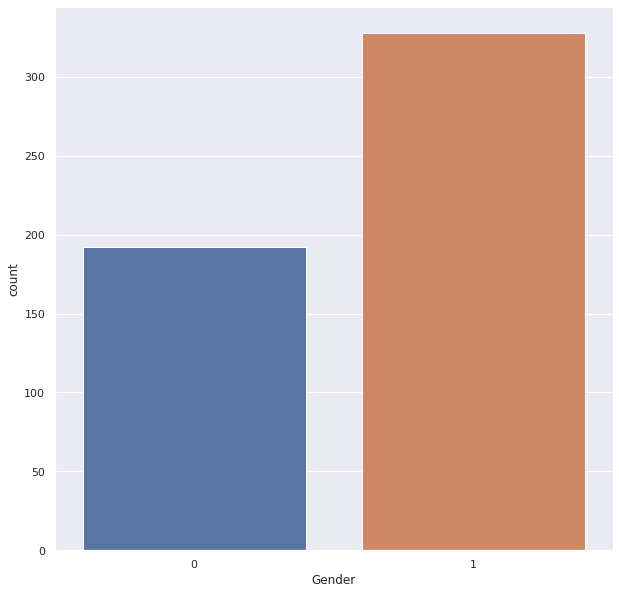

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style = "darkgrid", palette = "deep")
sns.countplot(x = "Gender", data = diabetes_df)
plt.show()

# Counting the "class" or the "status" of the patients.
> Counting How many are diagnosed with diabetes and How many are not diagnosed with diabetes.

In [ ]:
outcome = diabetes_df["class"]
outcome.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

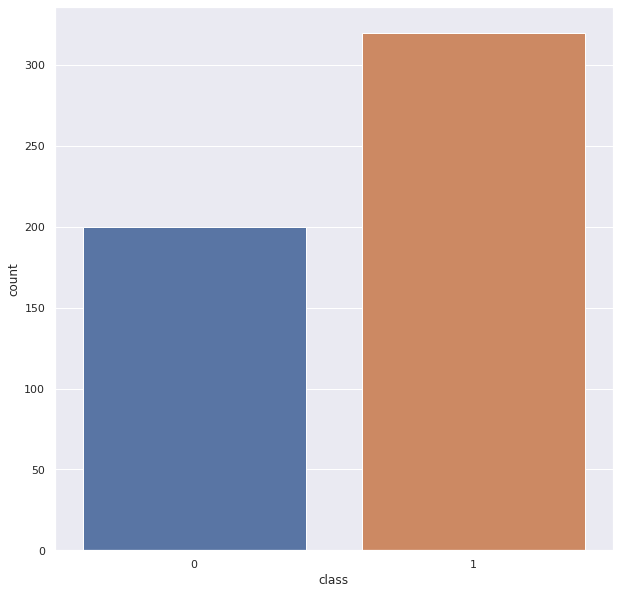

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style = "darkgrid", palette = "deep")
sns.countplot(x = "class", data = diabetes_df)
plt.show()

# Number of diabetic patients as per the age group

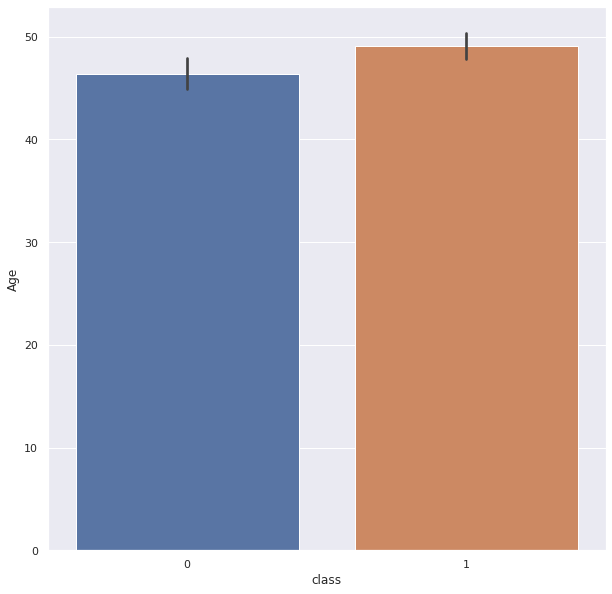

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style = "darkgrid", palette = "deep")
sns.barplot(x = 'class', y = "Age", data = diabetes_df)
plt.show()

> ## Distrbution of class and gender attributes

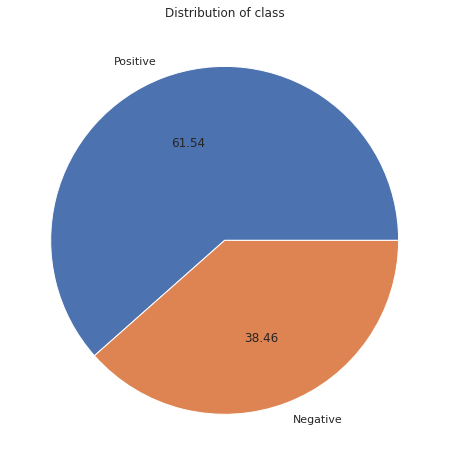

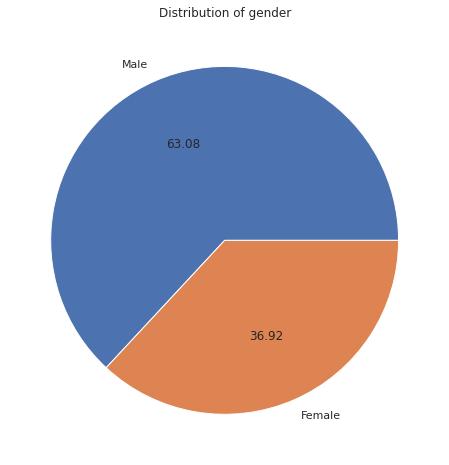

In [ ]:
def Pie_Plot(value, title, label):
  plt.figure(figsize=(8,8))
  plt.pie(value.value_counts(), labels = label, autopct = "%.2f")
  plt.title(title)
  plt.show()

Pie_Plot(diabetes_df["class"], "Distribution of class", ["Positive", "Negative"])
Pie_Plot(diabetes_df["Gender"], "Distribution of gender", ["Male", "Female"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


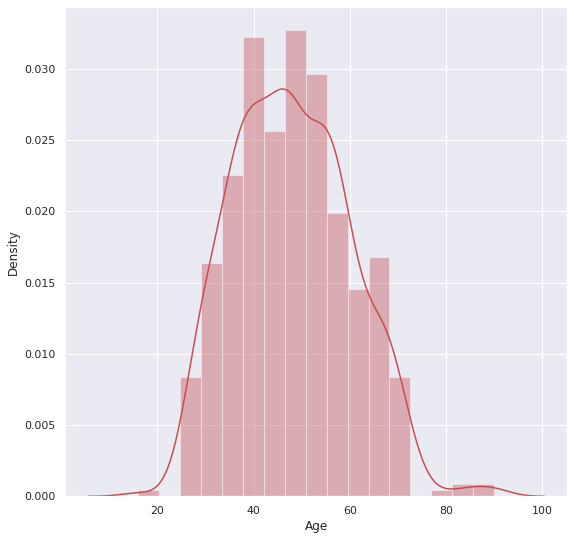

In [ ]:
plt.figure(figsize=(9,9))
ax = sns.distplot(diabetes_df["Age"], color = "r")
plt.savefig('/content/drive/MyDrive/DIabetes/Distribution_of_age.png')
plt.show()

>  <font size = 6> Relation between class and gender </font>

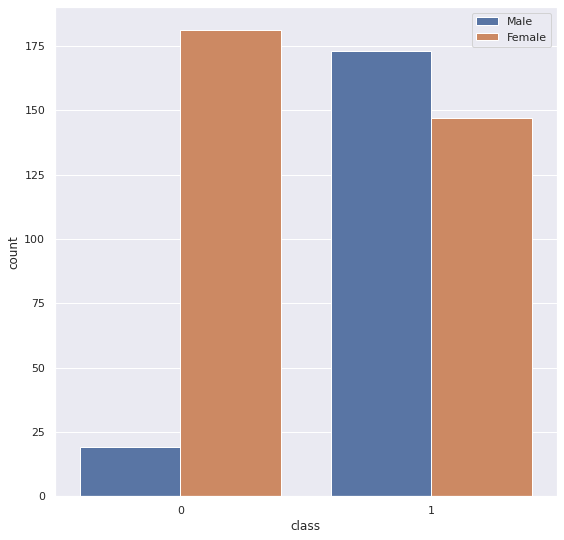

In [ ]:
plt.figure(figsize=(9,9))
ax = sns.countplot(x = "class", data = diabetes_df, hue = "Gender")
ax.legend(["Male", "Female"])
plt.show()

## Dividing the class data into positive and negative class data

In [ ]:
diabetes_df_pos = diabetes_df[diabetes_df["class"] == 1]
diabetes_df_neg = diabetes_df[diabetes_df["class"] == 0]
print(f'''Positive class data:\n {diabetes_df_pos}\n\n\n''')
print(f'''Negative class data:\n {diabetes_df_neg}''')

Positive class data:
      Age  Gender  Polyuria  ...  Alopecia  Obesity  class
0     40       1         0  ...         1        1      1
1     58       1         0  ...         1        0      1
2     41       1         1  ...         1        0      1
3     45       1         0  ...         0        0      1
4     60       1         1  ...         1        1      1
..   ...     ...       ...  ...       ...      ...    ...
513   62       0         1  ...         0        1      1
514   54       0         1  ...         0        0      1
515   39       0         1  ...         0        0      1
516   48       0         1  ...         0        0      1
517   58       0         1  ...         0        1      1

[320 rows x 17 columns]



Negative class data:
      Age  Gender  Polyuria  ...  Alopecia  Obesity  class
200   40       1         0  ...         0        0      0
201   28       1         0  ...         0        0      0
202   37       1         0  ...         0        0      0


In [ ]:
print("Average positive Age: ", diabetes_df_pos["Age"].mean())
print("Average negative Age: ", diabetes_df_neg["Age"].mean())

Average positive Age:  49.071875
Average negative Age:  46.36


# <font size = 6> Symptoms V/S Class

In [ ]:
diabetes_df_symptoms = diabetes_df.drop(["Age", "class", "Gender"], axis = 1)
diabetes_df_symptoms.head()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1


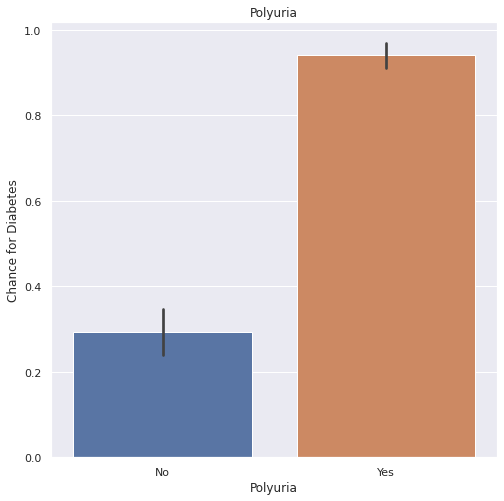

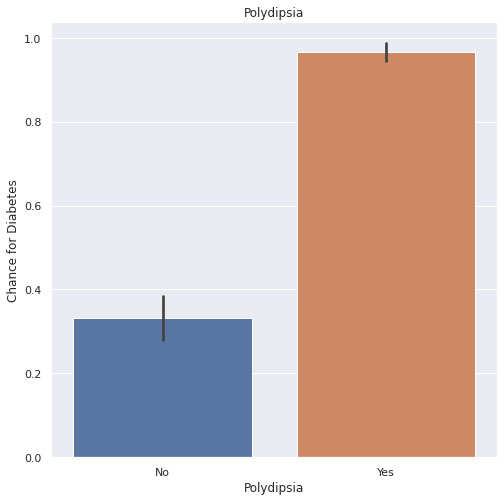

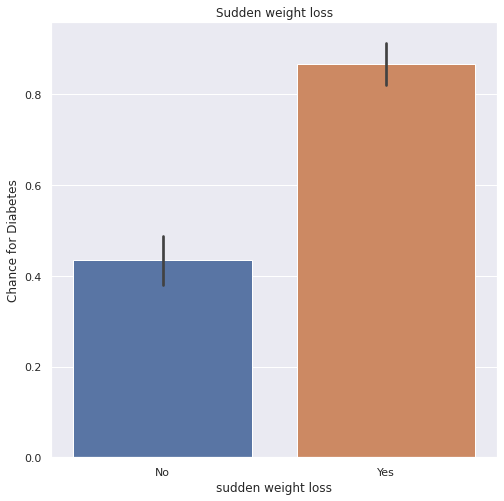

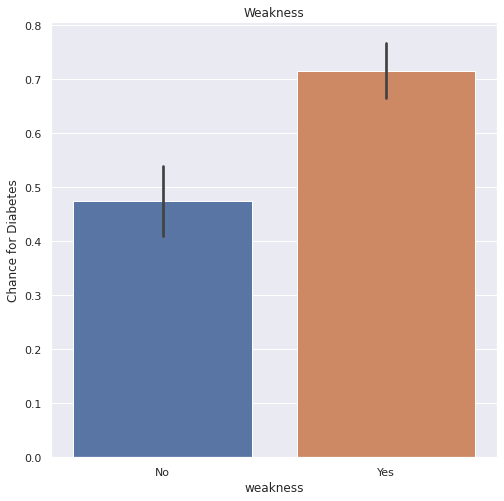

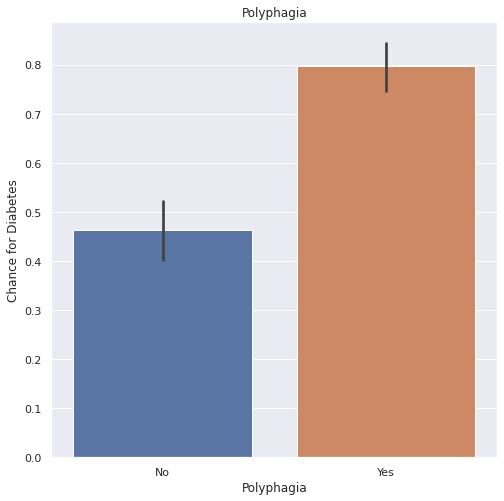

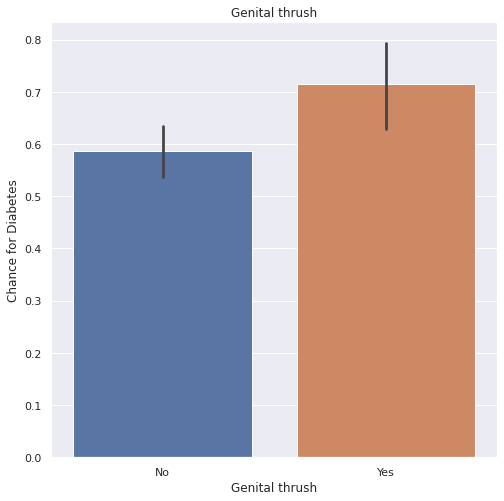

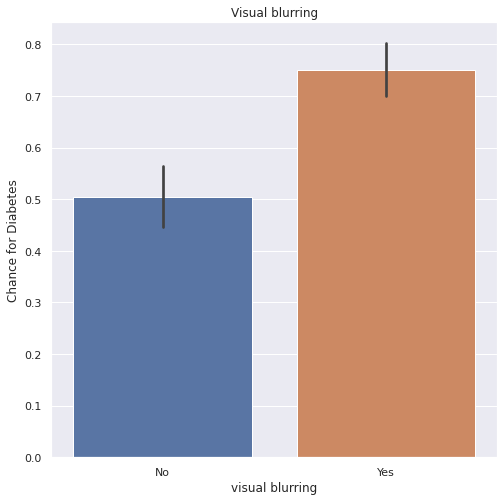

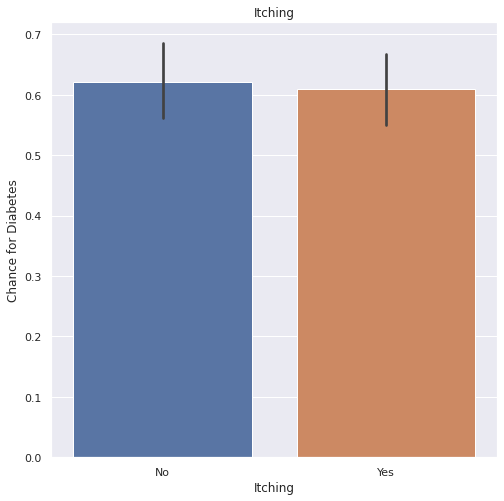

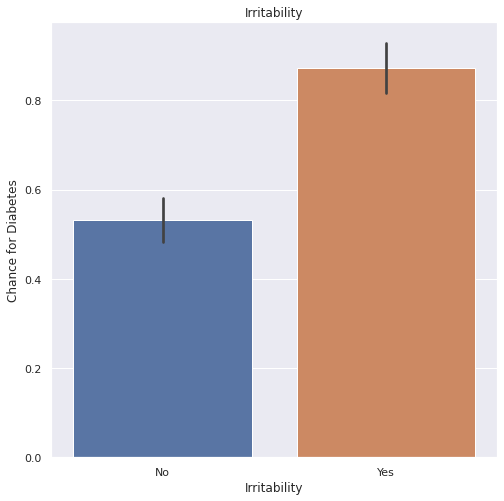

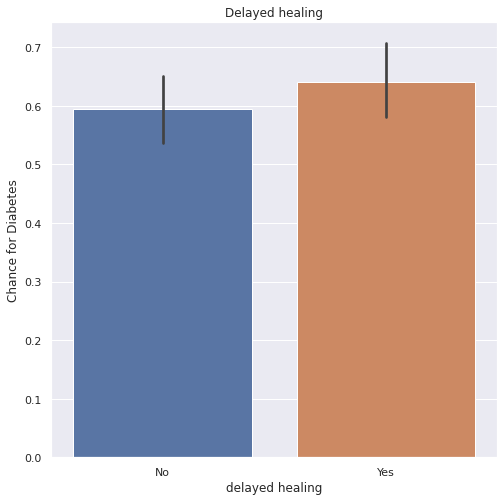

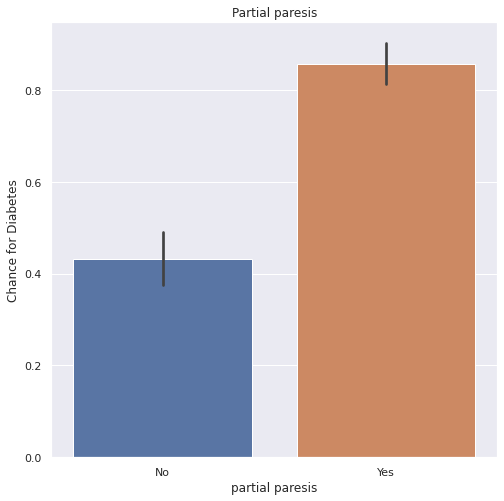

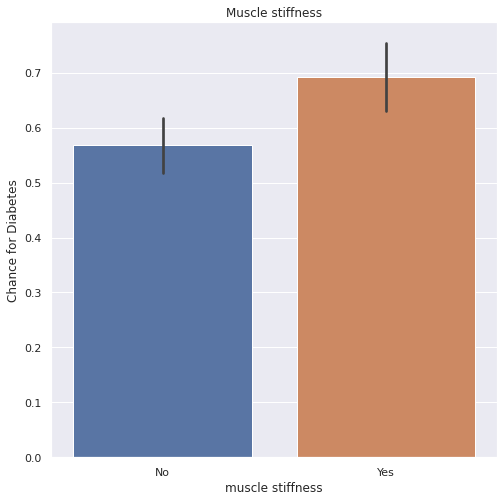

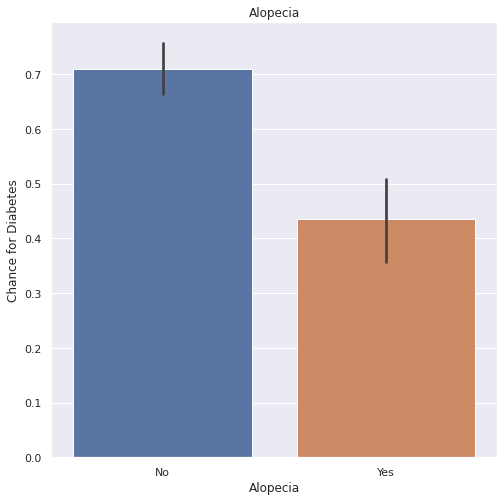

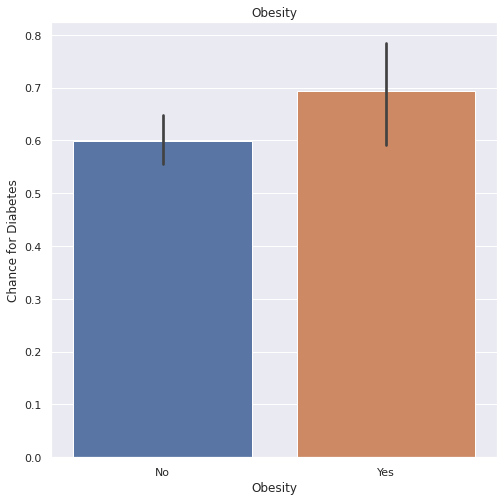

In [ ]:

for col in diabetes_df_symptoms.columns:
  plt.figure(figsize=(8,8))
  ax = sns.barplot(x = col, y = "class", data = diabetes_df)
  ax.set_xticklabels(["No", "Yes"])
  ax.set_ylabel("Chance for Diabetes")
  plt.title(col.capitalize())
  plt.show()
  


# <font size = 6> Frequency of Symptoms in all Patients

<Figure size 576x576 with 0 Axes>

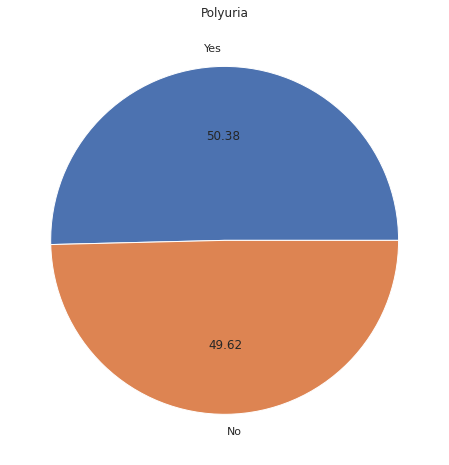

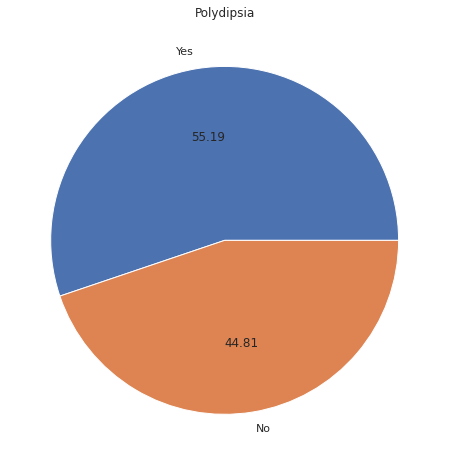

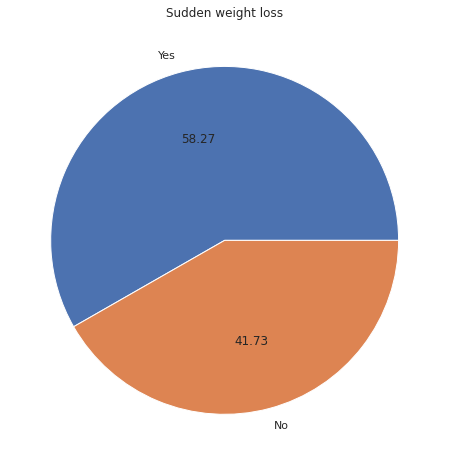

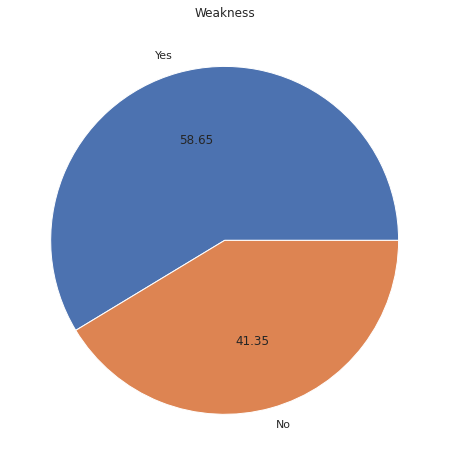

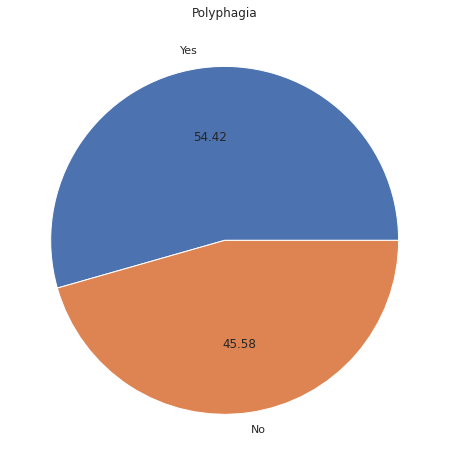

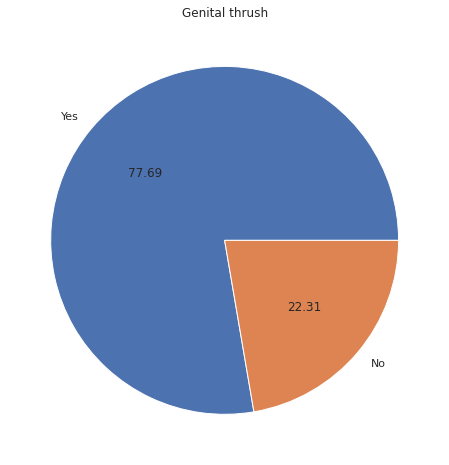

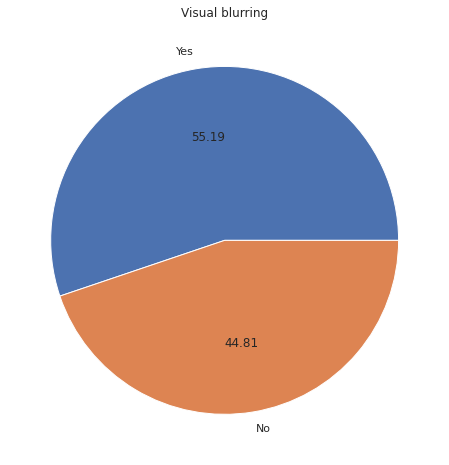

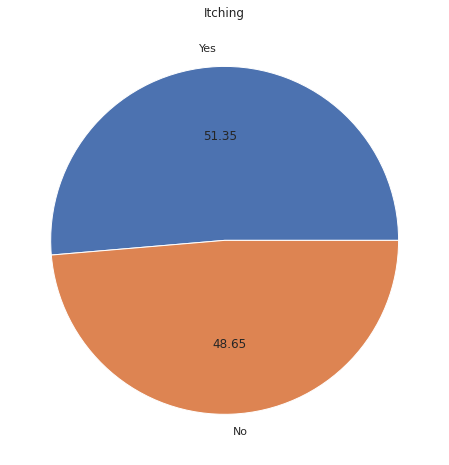

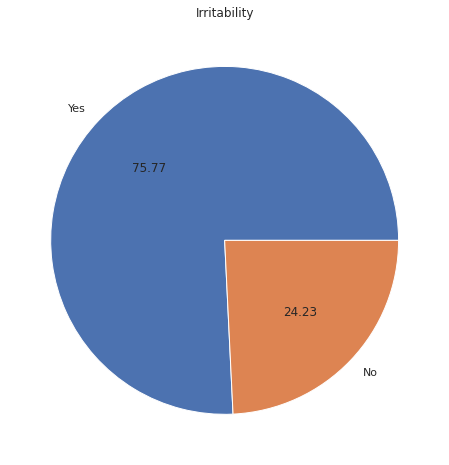

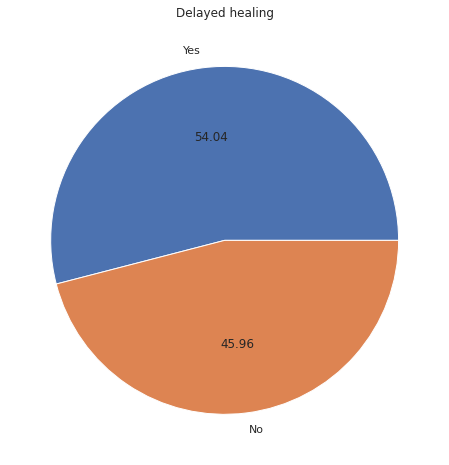

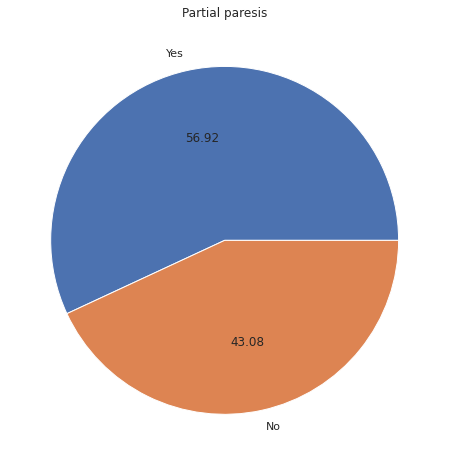

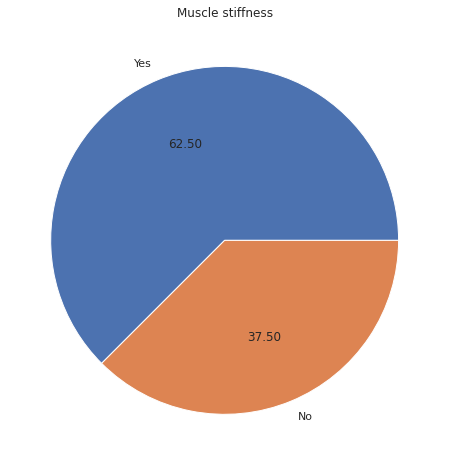

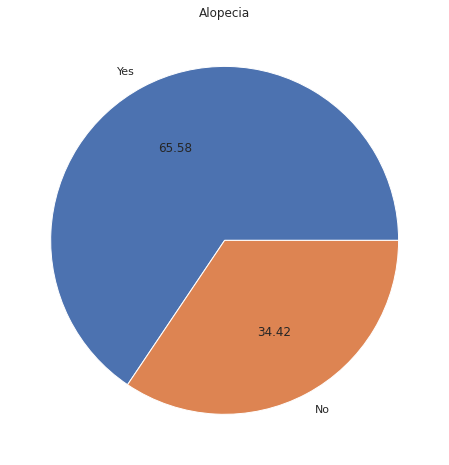

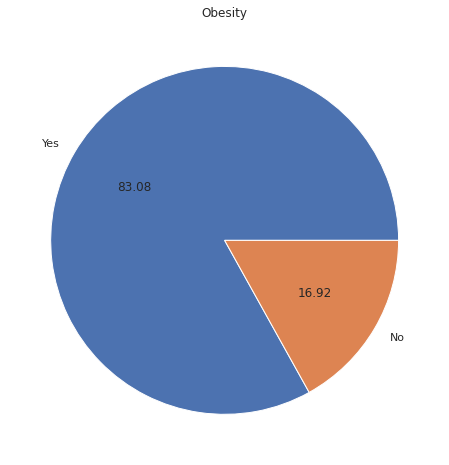

In [ ]:
plt.figure(figsize=(8,8))
for col in diabetes_df_symptoms.columns:
  Pie_Plot(diabetes_df_symptoms[col], col.capitalize(), ["Yes", "No"])
  

# <font size = 6> Correlation of Diabetes Data using Heatmap
> <font size = 5>More lighter the color is, More is the corelation factor

                         Age    Gender  Polyuria  ...  Alopecia   Obesity     class
Age                 1.000000  0.062872  0.199781  ...  0.321691  0.140458  0.108679
Gender              0.062872  1.000000 -0.268894  ...  0.327871 -0.005396 -0.449233
Polyuria            0.199781 -0.268894  1.000000  ... -0.144192  0.126567  0.665922
Polydipsia          0.137382 -0.312262  0.598609  ... -0.310964  0.098691  0.648734
sudden weight loss  0.064808 -0.281840  0.447207  ... -0.202727  0.169294  0.436568
weakness            0.224596 -0.124490  0.263000  ...  0.090490  0.045665  0.243275
Polyphagia          0.315577 -0.219968  0.373873  ... -0.053498  0.029785  0.342504
Genital thrush      0.096519  0.208961  0.087273  ...  0.204847  0.053828  0.110288
visual blurring     0.402729 -0.208092  0.235095  ...  0.014604  0.109005  0.251300
Itching             0.296559 -0.052496  0.088289  ...  0.266506  0.001894 -0.013384
Irritability        0.201625 -0.013735  0.237740  ...  0.043708  0.127801  0

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text major ticklabel objects>)

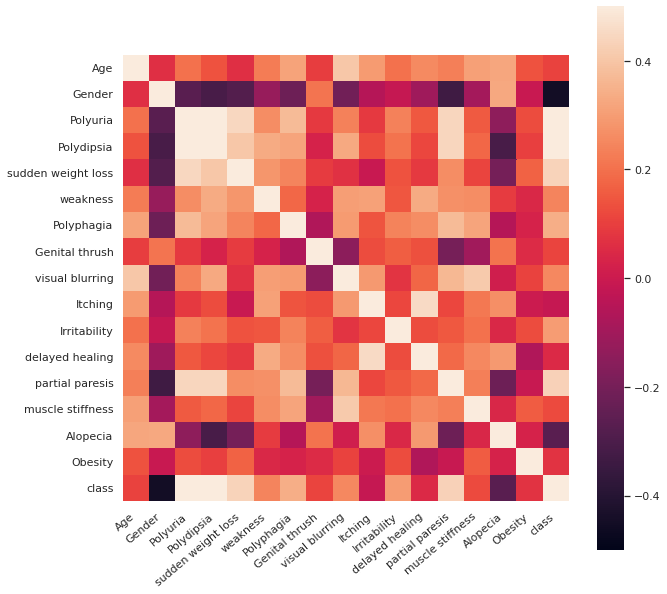

In [34]:
plt.figure(figsize = (10,10))
corr = diabetes_df.corr()
print(corr)
ax = sns.heatmap(corr, 
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            square = True,
            vmin = -.5, vmax = .5)
plt.xticks(rotation=40, horizontalalignment="right")

<font size = 6>From the above Heatmap, you can see that:</font>
* <font size = 5> Polysuria and Polydipsia has the highest correlation factor</font>
* <font size = 5>Next, sudden_weight_loss and partial_paresis has the next highest correlation factor</font>

# <font size = 7> Building Models

> <font size = 6> (1.a) Selecting Features: Using Pearson's Correlation coefficient</font>
>> <font size = 5> Pearson's Correlation Coefficient gives the strength of relationship between two features/variables</font>

>> <font size = 5>It lies between [-1,1] and more the value is near to 0, more the strength of teh relationship is low.</font>

In [ ]:
# Creating a dataframe for correlation of all the attributes with the 
# "class" of the data
 
features_corr = diabetes_df.corr()["class"].to_frame()
features_corr

,class
Age,0.108679
Gender,-0.449233
Polyuria,0.665922
Polydipsia,0.648734
sudden weight loss,0.436568
weakness,0.243275
Polyphagia,0.342504
Genital thrush,0.110288
visual blurring,0.251300
Itching,-0.013384


<font size = 6> We will be selecting the 10 features which have the highest correlation

In [ ]:
features_corr["class"] = abs(features_corr["class"])
features_corr = features_corr.sort_values(by = "class", ascending = False).reset_index()
features_corr = features_corr[1:11]['index']
features_corr_arr = features_corr.to_numpy()

In [ ]:
features_corr

1               Polyuria
2             Polydipsia
3                 Gender
4     sudden weight loss
5        partial paresis
6             Polyphagia
7           Irritability
8               Alopecia
9        visual blurring
10              weakness
Name: index, dtype: object

In [ ]:
features_corr_arr

array(['Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss',
       'partial paresis', 'Polyphagia', 'Irritability', 'Alopecia',
       'visual blurring', 'weakness'], dtype=object)

> <font size = 6> (1.b) Dividing the dataset into training and testing dataset</font>

>> <font size = 5> Training Dataset will have the "class" column</font>

>> <font size = 5> Testing Dataset will not have the "class" column</font>


In [ ]:
from sklearn.model_selection import train_test_split

x = diabetes_df[features_corr_arr]
y = diabetes_df["class"]

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 1)

> <font size = 6> (1.c) Feature Scaling: Using Data Standrization </font>

>> <font size = 5> Here we are scaling the Data i.e. we are bringing the given data into a  normal labels and format for the user to analyze and process it</font>

>> <font size = 5> Data Standardization is a method of Data Scaling which we will putting all the variables in the same scale/level and compare the different variables</font>


In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

> <font size = 6> (1.d) Baseline Validation</font>

>> <font size = 5> We will be using Reshampling Method : 10 fold cross validation for : Avoiding Overfitting and Comparing different ML classification algorithms</font>

In [ ]:
# Defining the Algorithm objects and creating a list to iterate the process
# of training the model using different approach

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

nb = GaussianNB()
lr = LogisticRegression(max_iter = 3000)
dt = tree.DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = SVC(probability = True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state =1)

vot = VotingClassifier(estimators = [('nb', nb), ('lr', lr), ('dt', dt),
                                     ('rf', rf), ('svc', svc), ('knn', knn),
                                     ('xgb',xgb)], voting = "soft")

models = [nb, lr, dt, rf, svc, knn, xgb, vot]

models_name = ["Naive Bayes", "Logistic Regression", "Decision Tree",
               "Random Forest", "Support Vector Machine", "K-Nearest Neighbor",
               "XGBoost", "Voting"]



<font size = 6>Here we are creating a baseline by training the data, giving a rough model of the results

> The actual prediction needs to be higher than this rough model or else we will disregard the used algorithm</font>

In [ ]:
from sklearn.model_selection import cross_val_score
results_base = {}

for index, model in enumerate(models):
  cv = cross_val_score(model, x_train, y_train, cv = 10)
  results_base[models_name[index]] = cv.mean()*100.0
  print(f'''Baseline Using: {models_name[index]} = {cv.mean() * 100.0}% with std dev: {cv.std()}''')

Baseline Using: Naive Bayes = 89.15214866434378% with std dev: 0.055925365069412016
Baseline Using: Logistic Regression = 88.19396051103368% with std dev: 0.06112974821308007
Baseline Using: Decision Tree = 93.00232288037166% with std dev: 0.037246981140594965
Baseline Using: Random Forest = 94.68641114982577% with std dev: 0.03765310446193635
Baseline Using: Support Vector Machine = 93.23461091753774% with std dev: 0.044833885410055174
Baseline Using: K-Nearest Neighbor = 92.04994192799072% with std dev: 0.05406279506957774
Baseline Using: XGBoost = 92.74680603948899% with std dev: 0.045229446974884874
Baseline Using: Voting = 92.52032520325203% with std dev: 0.05023131456630602


# <font size = 7> Prediction Time!!</font>

<Figure size 720x720 with 0 Axes>

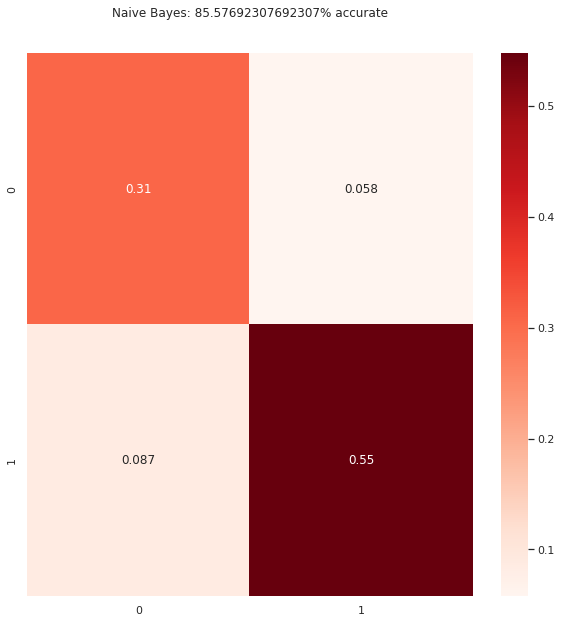

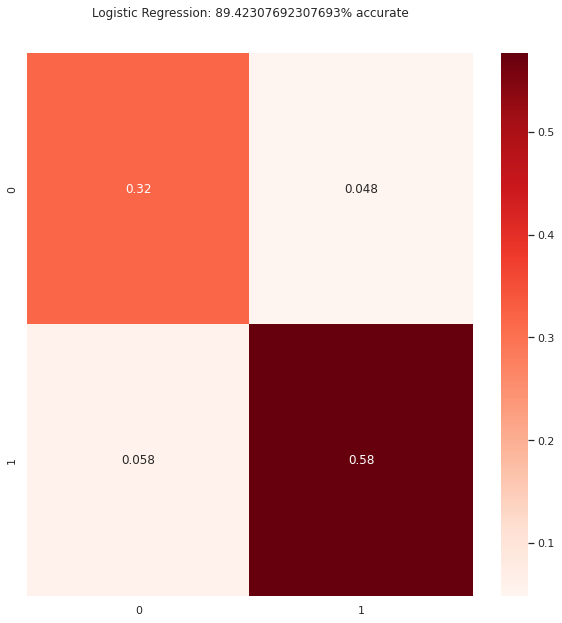

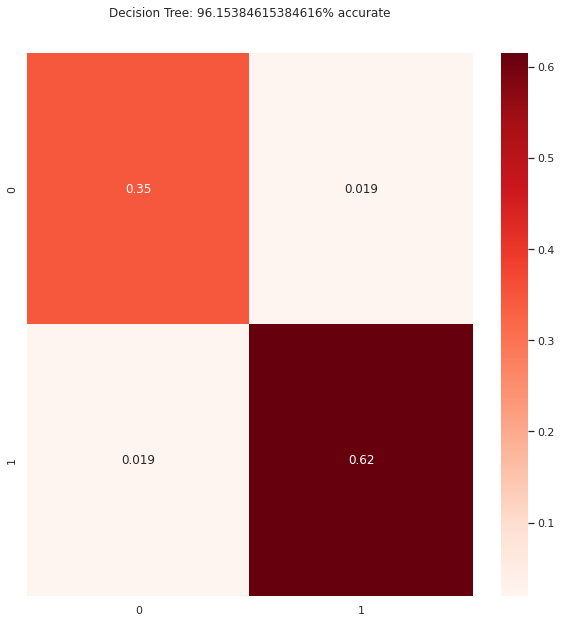

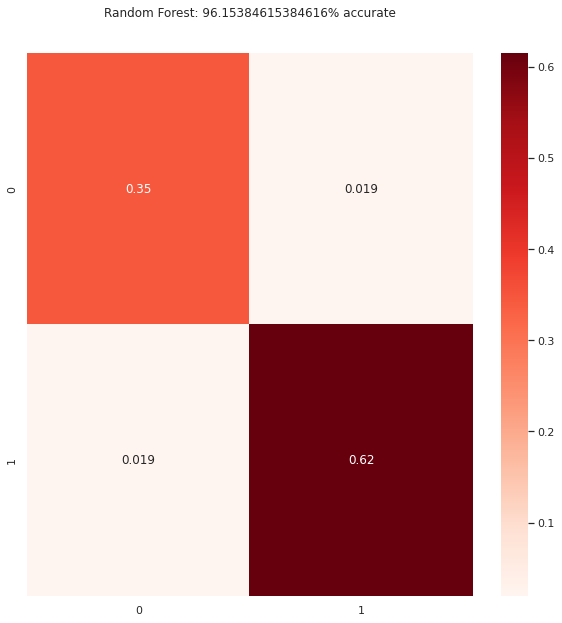

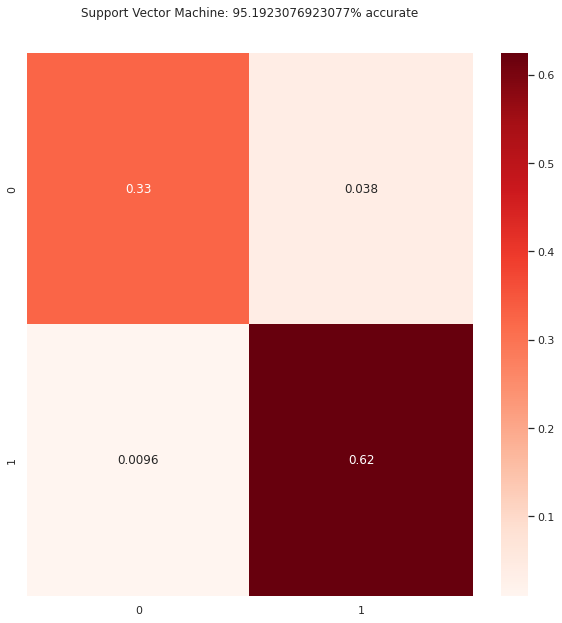

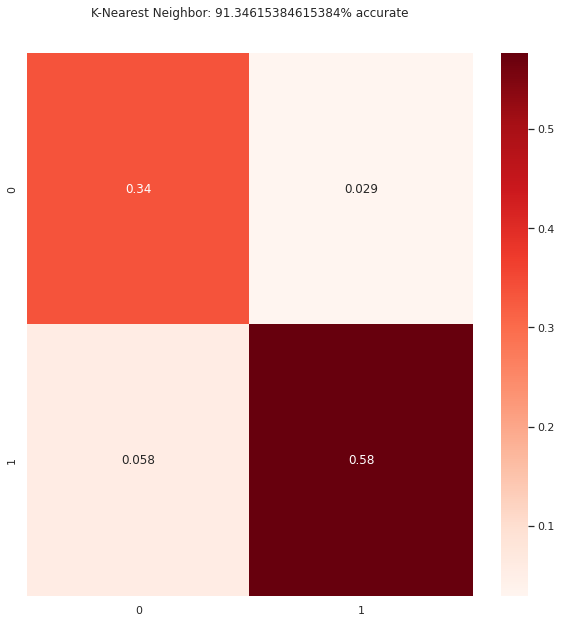

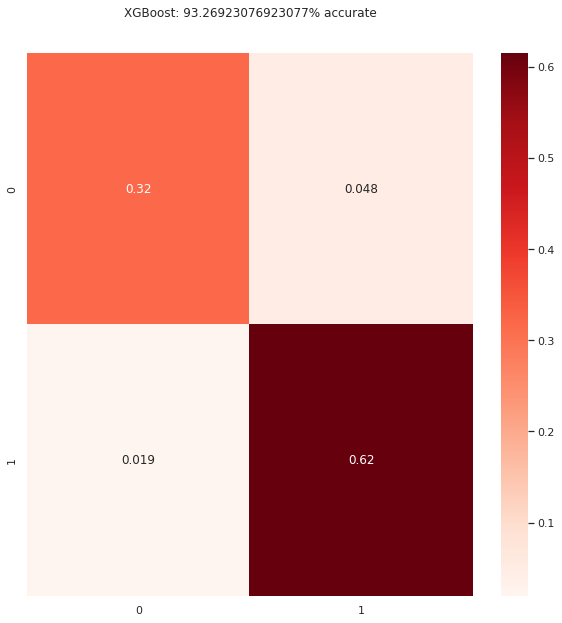

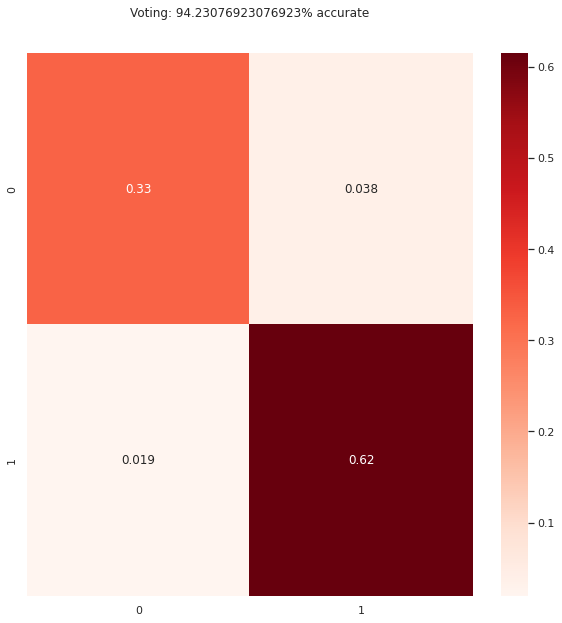

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
plt.figure(figsize=(10,10))
results = {}

for index, model in enumerate(models):
  plt.figure(figsize=(10,10))
  model.fit(x_train, y_train)
  predict = model.predict(x_test)
  confuse = confusion_matrix(y_test, predict)
  accuracy = accuracy_score(y_test, predict)
  results[models_name[index]] = accuracy * 100.0

  title = f'''{models_name[index]}: {accuracy * 100.0}% accurate\n\n'''
  ax = sns.heatmap(confuse/np.sum(confuse), annot = True, cmap = "Reds")
  ax.set_title(title)
  plt.show()

# <font size = 6> Comparing the perforamnce with Baseline</font>

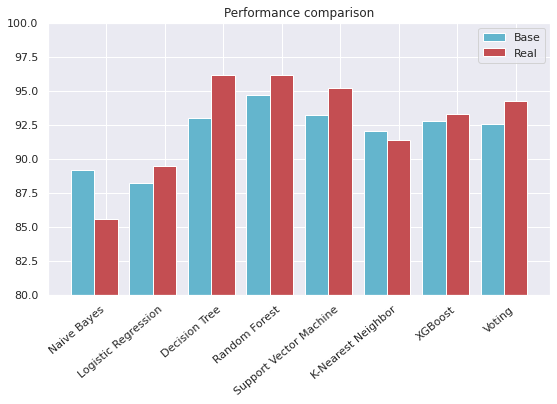

In [36]:
x = np.arange(len(results))

plt.figure(figsize=(9,5))
ax = plt.subplot(111)
ax.bar(x, results_base.values(), width=0.4, color="c", align="center")
ax.bar(x+0.4, results.values(), width=0.4, color="r", align="center")
ax.legend(("Base", "Real"))
plt.ylim((80, 100))
plt.xticks(x+0.4, results_base.keys())
plt.title("Performance comparison")
plt.xticks(rotation=40, horizontalalignment="right")
plt.show()

# <font size = 6> Conclusion </font>
> <font size = 5>In the above notebook, using different approaches and algorithms to build the model. It turns out Voting, KNN, SVM, Descision Trre, Random Forest are the best models for prediction

> The best accuracy I can get is with Voting with 90% accuracy and Random Forst with 89% accuracy uisng the Pearson's Correaltion Method for Feature Selection</font>